In [13]:
import pandas as pd
data = pd.read_csv('Nat_Gas.csv')
data.Dates = pd.to_datetime(data.Dates)
data.tail()

C:\Users\hwang\AppData\Local\Temp\ipykernel_23484\2131363216.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.Dates = pd.to_datetime(data.Dates)


,Dates,Prices
43,2024-05-31,11.4
44,2024-06-30,11.5
45,2024-07-31,11.6
46,2024-08-31,11.5
47,2024-09-30,11.8


In [14]:
data['Prices'].describe()

count    48.000000
mean     11.207083
std       0.757897
min       9.840000
25%      10.650000
50%      11.300000
75%      11.625000
max      12.800000
Name: Prices, dtype: float64

In [15]:
prices = data.Prices

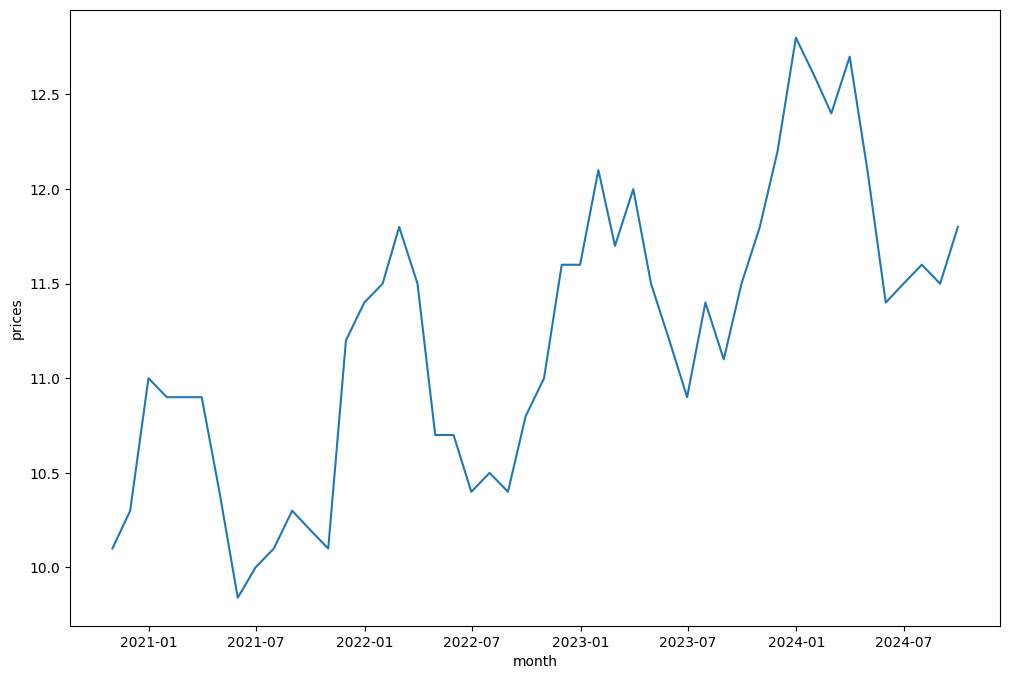

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.lineplot(x=data.Dates, y=prices)
plt.xlabel('month')
plt.ylabel('prices')
plt.show()

In [17]:
data.Dates.head()

0   2020-10-31
1   2020-11-30
2   2020-12-31
3   2021-01-31
4   2021-02-28
Name: Dates, dtype: datetime64[ns]

In [18]:
price_record = []
for i in range(12):
    price_record.append(pd.DataFrame(data[i::12], columns=['Prices']))

In [19]:
next_year = []
for i in range(12):
    next_year.append(price_record[i].std()+price_record[i].max())

In [20]:
price = pd.DataFrame(data=next_year)

In [21]:
end_time = pd.to_datetime('2024-09-30')
future_dates = pd.Series((pd.date_range(start=end_time + pd.offsets.MonthEnd(1), periods=(12), freq='M')), name='Dates')

C:\Users\hwang\AppData\Local\Temp\ipykernel_23484\1088218225.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.Series((pd.date_range(start=end_time + pd.offsets.MonthEnd(1), periods=(12), freq='M')), name='Dates')


In [22]:
future_dates

0    2024-10-31
1    2024-11-30
2    2024-12-31
3    2025-01-31
4    2025-02-28
5    2025-03-31
6    2025-04-30
7    2025-05-31
8    2025-06-30
9    2025-07-31
10   2025-08-31
11   2025-09-30
Name: Dates, dtype: datetime64[ns]

In [23]:
future_predictions = pd.concat([future_dates, price], axis=1)

In [24]:
new_data = pd.DataFrame(pd.concat([data,future_predictions]))

In [25]:
new_data.Dates.tail(2)

10   2025-08-31
11   2025-09-30
Name: Dates, dtype: datetime64[ns]

In [26]:
new_data['Year'] = new_data['Dates'].dt.year
new_data['Month'] = new_data['Dates'].dt.month

Text(0.5, 1.0, 'PREDICTION FOR 1 year ahead')

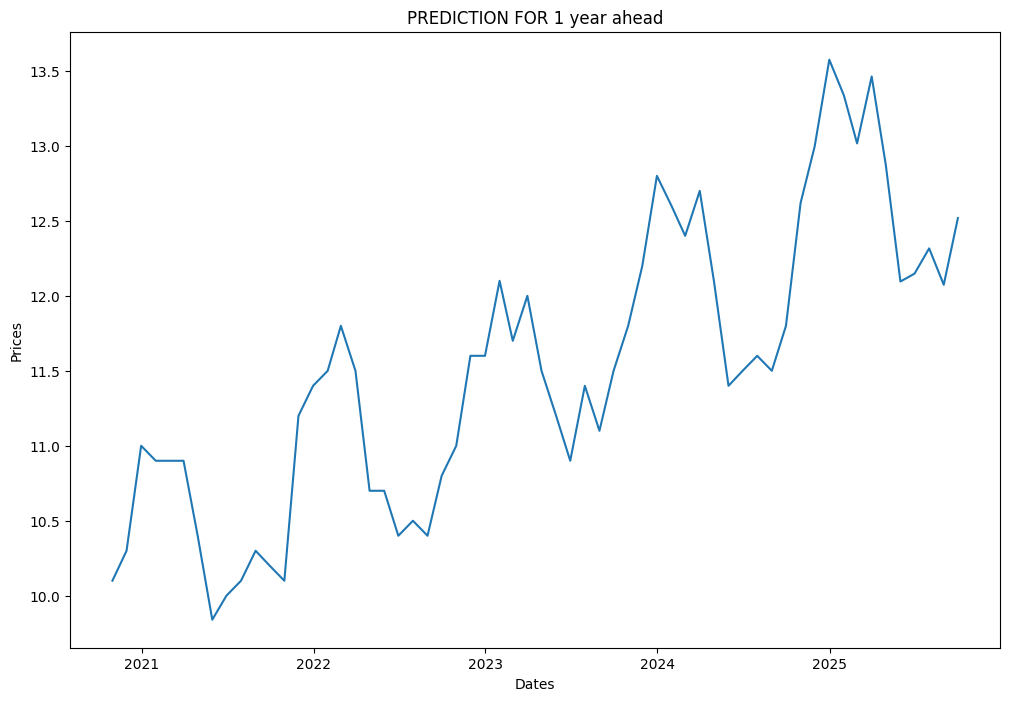

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(x=new_data['Dates'], y=new_data['Prices'])
plt.title("PREDICTION FOR 1 year ahead")

In [28]:
try:
    inp = pd.to_datetime(input('Enter a Date: from 2020-10-31-2025-09-30'))
    Year = inp.year
    Month = inp.month
    price_ = new_data[(new_data['Year']==Year) & (new_data['Month']==Month)]['Prices'].iloc[0]
    print(f"Price: {price_}")
except ValueError:
    print("Enter valid Date")

Price: 11.5


In [29]:
new_data.to_csv('net_gas.csv', index=False)